In [2]:
import yfinance as yf

In [3]:
# we'll be using the S&P 500 data 
sp500 = yf.Ticker("^GSPC")

In [5]:
# querying historical data 
sp500 = sp500.history(period="max")

In [7]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,0,0
2022-11-08 00:00:00-05:00,3817.020020,3859.399902,3786.280029,3828.110107,4607640000,0,0
2022-11-09 00:00:00-05:00,3810.939941,3818.199951,3744.219971,3748.570068,4645010000,0,0


In [12]:
sp500.index

DatetimeIndex(['1950-01-03 00:00:00-05:00', '1950-01-04 00:00:00-05:00',
               '1950-01-05 00:00:00-05:00', '1950-01-06 00:00:00-05:00',
               '1950-01-09 00:00:00-05:00', '1950-01-10 00:00:00-05:00',
               '1950-01-11 00:00:00-05:00', '1950-01-12 00:00:00-05:00',
               '1950-01-13 00:00:00-05:00', '1950-01-16 00:00:00-05:00',
               ...
               '2022-10-31 00:00:00-04:00', '2022-11-01 00:00:00-04:00',
               '2022-11-02 00:00:00-04:00', '2022-11-03 00:00:00-04:00',
               '2022-11-04 00:00:00-04:00', '2022-11-07 00:00:00-05:00',
               '2022-11-08 00:00:00-05:00', '2022-11-09 00:00:00-05:00',
               '2022-11-10 00:00:00-05:00', '2022-11-11 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=18336, freq=None)

# Cleaning Data

For our machine learning model we don't need the `Dividends` and `Stock Splits` columns so we'll delete them from the dataframe

In [8]:
del sp500["Dividends"]

In [10]:
del sp500["Stock Splits"]

In [11]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...
2022-11-07 00:00:00-05:00,3780.709961,3813.949951,3764.699951,3806.800049,4341620000
2022-11-08 00:00:00-05:00,3817.020020,3859.399902,3786.280029,3828.110107,4607640000
2022-11-09 00:00:00-05:00,3810.939941,3818.199951,3744.219971,3748.570068,4645010000


<AxesSubplot:xlabel='Date'>

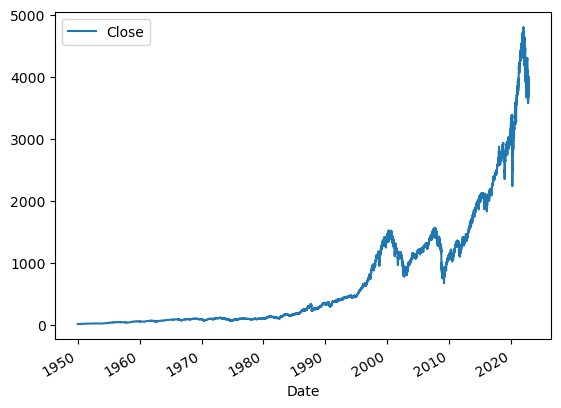

In [13]:
sp500.plot.line(y="Close", use_index=True)

We're going to create a new column in the `sp500` dataframe called `Tomorrow` which will hold the closing price of the next day's stock. This will tell us if the price of the stock went up or not.

In [15]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [16]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,3828.110107
2022-11-08 00:00:00-05:00,3817.020020,3859.399902,3786.280029,3828.110107,4607640000,3748.570068
2022-11-09 00:00:00-05:00,3810.939941,3818.199951,3744.219971,3748.570068,4645010000,3956.370117


We're now going to create a column in the dataframe called `Target`, which is what we want our machine-learning model to predict.

In [17]:
# We're converting the boolean return into an int so we can use it in our model
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [18]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,3828.110107,1
2022-11-08 00:00:00-05:00,3817.020020,3859.399902,3786.280029,3828.110107,4607640000,3748.570068,0
2022-11-09 00:00:00-05:00,3810.939941,3818.199951,3744.219971,3748.570068,4645010000,3956.370117,1


Our dataframe has a lot of historical data which is usually good, but when looking at stock prices we don't want to use data that's too old because there could be fundamental changes in the stock market throughout time. So we're only going to look at data from present day up until 1990. 

In [19]:
sp500 = sp500.loc["1990-01-01":].copy()

In [20]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,3828.110107,1
2022-11-08 00:00:00-05:00,3817.020020,3859.399902,3786.280029,3828.110107,4607640000,3748.570068,0
2022-11-09 00:00:00-05:00,3810.939941,3818.199951,3744.219971,3748.570068,4645010000,3956.370117,1


# Initial Model

To train our model we're going to use a `RandomForestClassifier`, which train individual decision trees with randomized parameters and gets the average of all the results which makes RandomForestClassifers resistant to overfitting. RandomForestClassifiers are also great at picking up non-linear tendencies in the data which will be especially useful for us since we're working with stock price data which is non-linear. 

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500[-100:]

predictors = ["Close", "Open", "Volume", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [22]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [23]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [25]:
preds

Date
2022-06-23 00:00:00-04:00    1
2022-06-24 00:00:00-04:00    1
2022-06-27 00:00:00-04:00    1
2022-06-28 00:00:00-04:00    1
2022-06-29 00:00:00-04:00    1
                            ..
2022-11-07 00:00:00-05:00    1
2022-11-08 00:00:00-05:00    1
2022-11-09 00:00:00-05:00    1
2022-11-10 00:00:00-05:00    1
2022-11-11 00:00:00-05:00    1
Length: 100, dtype: int64

In [26]:
precision_score(test["Target"], preds)

0.40229885057471265

We can see above that our model only has approximately 40% accuracy, meaning when the model predicts whether stocks will increase or not it only gets it correct 40% of the time. This is not good for us so we'll continue to train the model and see if we can get better accuracy.

In [29]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

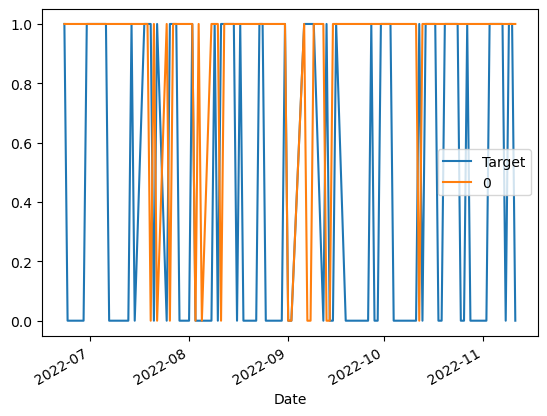

In [30]:
combined.plot()

From our graph above it seems like the model predicted that the price of the stock would go up when in reality it went down.

# Backtesting

In [31]:
def prediction(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [52]:
# start=2500, we're training our data with 2500 days or about 10 years of data
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = new_prediction(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [40]:
predictions = backtest(sp500, model, predictors)

In [41]:
predictions["Predictions"].value_counts()

0    3336
1    2446
Name: Predictions, dtype: int64

In [42]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5282093213409649

We can see above that we managed to increase the accuracy of our model from 40% up to approximately 53%. Although this is still not ideal, it gives us confidence in our model and we can continue to increase the accuracy of the model by backtesting.

In [44]:
# we'll use the horizons to check the price of the stock in the last 2 days, 5 days (week), 60 days (3 months), 250 days (1 year), 1000 days (4 years)
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [45]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,3828.110107,1,1.004784,2.0,1.006396,2.0,0.984323,24.0,0.905171,111.0,1.062130,544.0
2022-11-08 00:00:00-05:00,3817.020020,3859.399902,3786.280029,3828.110107,4607640000,3748.570068,0,1.002791,2.0,1.013530,3.0,0.991838,24.0,0.910947,112.0,1.067751,544.0
2022-11-09 00:00:00-05:00,3810.939941,3818.199951,3744.219971,3748.570068,4645010000,3956.370117,1,0.989502,1.0,0.993056,3.0,0.973570,23.0,0.892785,111.0,1.045257,544.0


In [57]:
sp500 = sp500.dropna()

In [48]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split=50, random_state=1)

In [61]:
def new_prediction(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [62]:
predictions = backtest(sp500, model, new_predictors)

In [63]:
predictions["Predictions"].value_counts()

0.0    3969
1.0     812
Name: Predictions, dtype: int64

In [64]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5689655172413793

We've increased our model's precision from `53%` up to `57%` using backtesting and adding new predictors. 